In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn import svm 
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)
from util import *

train_split=0.7 # fraction of the data used in a training set

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [181]:
######################################################################
#################### Load raw TADPOLE Data COMPLETE. ##########################
######################################################################
biomarkers = [
                'FDG', 'AV45',
                'ABETA_UPENNBIOMK9_04_19_17', 'TAU_UPENNBIOMK9_04_19_17', 'PTAU_UPENNBIOMK9_04_19_17',
                'Hippocampus', 'WholeBrain', 'Entorhinal', 'MidTemp',
                'CEREBELLUMGREYMATTER_UCBERKELEYAV45_10_17_16',
                'WHOLECEREBELLUM_UCBERKELEYAV45_10_17_16',
                'ERODED_SUBCORTICALWM_UCBERKELEYAV45_10_17_16',
                'FRONTAL_UCBERKELEYAV45_10_17_16',
                'CINGULATE_UCBERKELEYAV45_10_17_16',
                'PARIETAL_UCBERKELEYAV45_10_17_16',
                'TEMPORAL_UCBERKELEYAV45_10_17_16',
                'SUMMARYSUVR_WHOLECEREBNORM_UCBERKELEYAV45_10_17_16',
                'SUMMARYSUVR_WHOLECEREBNORM_1.11CUTOFF_UCBERKELEYAV45_10_17_16',
                'SUMMARYSUVR_COMPOSITE_REFNORM_UCBERKELEYAV45_10_17_16',
                'SUMMARYSUVR_COMPOSITE_REFNORM_0.79CUTOFF_UCBERKELEYAV45_10_17_16',
                'BRAINSTEM_UCBERKELEYAV45_10_17_16',
                'BRAINSTEM_SIZE_UCBERKELEYAV45_10_17_16',
                'VENTRICLE_3RD_UCBERKELEYAV45_10_17_16',
                'VENTRICLE_3RD_SIZE_UCBERKELEYAV45_10_17_16',
                'VENTRICLE_4TH_UCBERKELEYAV45_10_17_16',
                'VENTRICLE_4TH_SIZE_UCBERKELEYAV45_10_17_16',
                'VENTRICLE_5TH_UCBERKELEYAV45_10_17_16',
                'VENTRICLE_5TH_SIZE_UCBERKELEYAV45_10_17_16',
                'CC_ANTERIOR_UCBERKELEYAV45_10_17_16',
                'CC_ANTERIOR_SIZE_UCBERKELEYAV45_10_17_16',
                'CC_CENTRAL_UCBERKELEYAV45_10_17_16',
                'CC_CENTRAL_SIZE_UCBERKELEYAV45_10_17_16',
                'CC_MID_ANTERIOR_UCBERKELEYAV45_10_17_16',
                'CC_MID_ANTERIOR_SIZE_UCBERKELEYAV45_10_17_16',
                'CC_MID_POSTERIOR_UCBERKELEYAV45_10_17_16',
                'CC_MID_POSTERIOR_SIZE_UCBERKELEYAV45_10_17_16',
                'CC_POSTERIOR_UCBERKELEYAV45_10_17_16',
                'CC_POSTERIOR_SIZE_UCBERKELEYAV45_10_17_16',
                'CSF_UCBERKELEYAV45_10_17_16',
                'CSF_SIZE_UCBERKELEYAV45_10_17_16',
                'CTX_LH_BANKSSTS_UCBERKELEYAV45_10_17_16',
                'CTX_LH_BANKSSTS_SIZE_UCBERKELEYAV45_10_17_16',
                'CTX_LH_CAUDALANTERIORCINGULATE_UCBERKELEYAV45_10_17_16',
                'CTX_LH_CAUDALANTERIORCINGULATE_SIZE_UCBERKELEYAV45_10_17_16',
                'CTX_LH_CAUDALMIDDLEFRONTAL_UCBERKELEYAV45_10_17_16',
                'CTX_LH_CAUDALMIDDLEFRONTAL_SIZE_UCBERKELEYAV45_10_17_16',
                'CTX_LH_CUNEUS_UCBERKELEYAV45_10_17_16',
                'CTX_LH_CUNEUS_SIZE_UCBERKELEYAV45_10_17_16',
                'CTX_LH_ENTORHINAL_UCBERKELEYAV45_10_17_16',
                'CTX_LH_ENTORHINAL_SIZE_UCBERKELEYAV45_10_17_16',
                'CTX_LH_FRONTALPOLE_UCBERKELEYAV45_10_17_16',
                'CTX_LH_FRONTALPOLE_SIZE_UCBERKELEYAV45_10_17_16',
                'CTX_LH_FUSIFORM_UCBERKELEYAV45_10_17_16',
                'CTX_LH_FUSIFORM_SIZE_UCBERKELEYAV45_10_17_16',
                'CTX_LH_INFERIORPARIETAL_UCBERKELEYAV45_10_17_16',
                'CTX_LH_INFERIORPARIETAL_SIZE_UCBERKELEYAV45_10_17_16',
                'CTX_LH_INFERIORTEMPORAL_UCBERKELEYAV45_10_17_16',
                'CTX_LH_INFERIORTEMPORAL_SIZE_UCBERKELEYAV45_10_17_16',
                'CTX_LH_INSULA_UCBERKELEYAV45_10_17_16',
                'CTX_LH_INSULA_SIZE_UCBERKELEYAV45_10_17_16',
                'CTX_LH_ISTHMUSCINGULATE_UCBERKELEYAV45_10_17_16',
                'CTX_LH_ISTHMUSCINGULATE_SIZE_UCBERKELEYAV45_10_17_16',
                'CTX_LH_LATERALOCCIPITAL_UCBERKELEYAV45_10_17_16',
                'CTX_LH_LATERALOCCIPITAL_SIZE_UCBERKELEYAV45_10_17_16',
                'CTX_LH_LATERALORBITOFRONTAL_UCBERKELEYAV45_10_17_16',
                'CTX_LH_LATERALORBITOFRONTAL_SIZE_UCBERKELEYAV45_10_17_16',
                'CTX_LH_LINGUAL_UCBERKELEYAV45_10_17_16',
                'CTX_LH_LINGUAL_SIZE_UCBERKELEYAV45_10_17_16',
                'CTX_LH_MEDIALORBITOFRONTAL_UCBERKELEYAV45_10_17_16',
                'CTX_LH_MEDIALORBITOFRONTAL_SIZE_UCBERKELEYAV45_10_17_16',
                'CTX_LH_MIDDLETEMPORAL_UCBERKELEYAV45_10_17_16',
                'CTX_LH_MIDDLETEMPORAL_SIZE_UCBERKELEYAV45_10_17_16',
                'CTX_LH_PARACENTRAL_UCBERKELEYAV45_10_17_16',
                'CTX_LH_PARACENTRAL_SIZE_UCBERKELEYAV45_10_17_16',
                'CTX_LH_PARAHIPPOCAMPAL_UCBERKELEYAV45_10_17_16',
               'CTX_LH_PARAHIPPOCAMPAL_SIZE_UCBERKELEYAV45_10_17_16',
            ]

demographic = ['AGE', 'PTGENDER', 'PTEDUCAT', 'PTMARRY','APOE4']

cognitive_test = [ 'ADAS11', 'MMSE', 'RAVLT_immediate', 'CDRSB',]

features = biomarkers + demographic + cognitive_test


tadpole2 = pd.read_csv('TADPOLE_D1_D2.csv',
                       usecols=features + ['DX'],
                       low_memory=False)  
tadpole2 = tadpole2.dropna()
# tadpole2 = collapse_dx(tadpole2)
print('tadpole train labels preprocssed.')
print('NL' , np.sum(tadpole2['DX'] == 'NL'))
print('MCI' , np.sum(tadpole2['DX'] == 'MCI'))
print('Dementia' , np.sum(tadpole2['DX'] == 'Dementia'))
print('NL to MCI' , np.sum(tadpole2['DX'] == 'NL to MCI'))
print('MCI to NL' , np.sum(tadpole2['DX'] == 'MCI to NL'))
print('MCI to Dementia' , np.sum(tadpole2['DX'] == 'MCI to Dementia'))
# print('t2', tadpole2)

tadpole train labels preprocssed.
NL 122
MCI 196
Dementia 45
NL to MCI 1
MCI to NL 4
MCI to Dementia 8


In [26]:
########### USING OTHER BIOMARKERS #############
x_train, y_train, x_test, y_test = preprocess_volumetric(tadpole2, train_split)
# print('xt',x_train)



# pd.unique(tadpole2['DX'])
# tadpole2

xt []
tadpole train labels preprocssed.
NL 122
MCI 0
Dementia 241
NL to MCI 0
MCI to NL 0
MCI to Dementia 8


In [17]:
# Fit a linear kernel SVM model

linearsvm_model = svm.SVC(kernel='linear')
# linearsvm_model = LinearSVC(verbose=2, max_iter=10000000, dual=False, C=1, penalty='l1')

linearsvm_model.fit(x_train, y_train)

ValueError: Found array with 0 sample(s) (shape=(0, 85)) while a minimum of 1 is required.

In [12]:
# Evaluate using test set.
predicted_labels = linearsvm_model.predict(x_test)
print('sklearn acc training acc: ', accuracy_score(y_train, linearsvm_model.predict(x_train)))
print('sklearn acc test acc: ', accuracy_score(y_test, predicted_labels))

sklearn acc training acc:  0.89756097561
sklearn acc test acc:  0.755813953488


Confusion matrix
[[ 1 15]
 [ 6 64]]


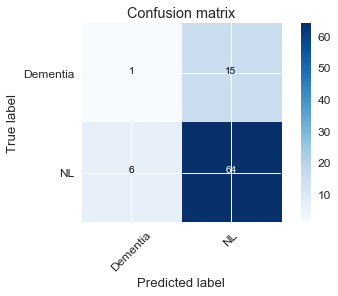

In [13]:
# Confusion Matrix
cnf_matrix=confusion_matrix(y_test, predicted_labels)
class_names=list(['Dementia','NL'])

plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')

**Combining Data**

1) Delete "NL to MCI" and "MCI to NL". There are only few of these data points.

2) Collapse "MCI to Dementia", "MCI", and "Dementia" into just "Dementia".

See collapse_dx in util.py

** BIOMARKERS ONLY **
  **NOTE: Uncollapsed labels. SVC linear**

    sklearn acc training acc:  0.631067961165 

    sklearn acc test acc:  0.436781609195


    LinearSVC, regularized

    sklearn acc training acc:  0.665048543689

    sklearn acc test acc:  0.436781609195


  **Collapsed MCI -> NL**

    sklearn acc training acc:  0.921951219512

    sklearn acc test acc:  0.767441860465


In [102]:
########### USING BIOMARKERS + DEMOGRAPHIC + COGNITIVE TESTS #############
x, y = preprocess_all_feat(tadpole2)
x_train, y_train, x_test, y_test = split_data(x,y, train_split)
#print('y',y_train)
# Fit a linear kernel SVM model

#linearsvm_model = svm.SVC(kernel='linear')
linearsvm_model = LinearSVC(verbose=2, max_iter=1000000, dual=False, C=1, penalty='l1')

linearsvm_model.fit(x_train, y_train)

reet ['NL' 'Dementia']
[LibLinear]

/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:898: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.0001,
     verbose=2)

sklearn acc training acc:  1.0
sklearn acc test acc:  0.895348837209
Confusion matrix
[[ 8  2]
 [ 7 69]]


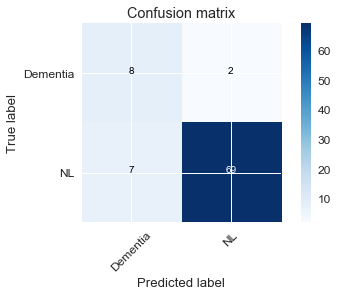

In [104]:
# Evaluate using test set.
predicted_labels = linearsvm_model.predict(x_test)
print('sklearn acc training acc: ', accuracy_score(y_train, linearsvm_model.predict(x_train)))
print('sklearn acc test acc: ', accuracy_score(y_test, predicted_labels))
# Confusion Matrix
cnf_matrix=confusion_matrix(y_test, predicted_labels)
class_names=list(['Dementia','NL'])
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')

** BIOMARKERS + DEMOGRAPHIC + COGNITIVE TESTS, (MCI->NL)**

C=.0001, penalty='l1'

sklearn acc training acc:  1.0

sklearn acc test acc:  0.802325581395


C=1, penalty='l1'

sklearn acc training acc:  1.0 

sklearn acc test acc:  0.895348837209

In [ ]:
######### HOLD OUT CROSS VALIDATION ##########

In [179]:
x, y = preprocess_all_feat(tadpole2)
hold_out_CV(x,y, svc='poly', svmc=.01)


xltr (205, 2) ylte (88, 1)
y.iloc[test_index] 88
train score 0.90243902439  test score 0.647727272727

xltr (205, 2) ylte (88, 1)
y.iloc[test_index] 88
train score 0.931707317073  test score 0.738636363636

xltr (205, 2) ylte (88, 1)
y.iloc[test_index] 88
train score 0.907317073171  test score 0.727272727273

xltr (205, 2) ylte (88, 1)
y.iloc[test_index] 88
train score 0.926829268293  test score 0.647727272727

xltr (205, 2) ylte (88, 1)
y.iloc[test_index] 88
train score 0.907317073171  test score 0.738636363636

xltr (205, 2) ylte (88, 1)
y.iloc[test_index] 88
train score 0.853658536585  test score 0.738636363636

xltr (205, 2) ylte (88, 1)
y.iloc[test_index] 88
train score 0.912195121951  test score 0.704545454545

xltr (205, 2) ylte (88, 1)
y.iloc[test_index] 88
train score 0.892682926829  test score 0.738636363636

xltr (205, 2) ylte (88, 1)
y.iloc[test_index] 88
train score 0.912195121951  test score 0.75

xltr (205, 2) ylte (88, 1)
y.iloc[test_index] 88
train score 0.90243902439

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



xltr (205, 2) ylte (88, 1)
y.iloc[test_index] 88
train score 0.907317073171  test score 0.693181818182

xltr (205, 2) ylte (88, 1)
y.iloc[test_index] 88
train score 0.917073170732  test score 0.693181818182

xltr (205, 2) ylte (88, 1)
y.iloc[test_index] 88
train score 0.892682926829  test score 0.704545454545

xltr (205, 2) ylte (88, 1)
y.iloc[test_index] 88
train score 0.917073170732  test score 0.761363636364

xltr (205, 2) ylte (88, 1)
y.iloc[test_index] 88
train score 0.912195121951  test score 0.727272727273

xltr (205, 2) ylte (88, 1)
y.iloc[test_index] 88
train score 0.936585365854  test score 0.727272727273

xltr (205, 2) ylte (88, 1)
y.iloc[test_index] 88
train score 0.956097560976  test score 0.693181818182

xltr (205, 2) ylte (88, 1)
y.iloc[test_index] 88
train score 0.921951219512  test score 0.715909090909

xltr (205, 2) ylte (88, 1)
y.iloc[test_index] 88
train score 0.936585365854  test score 0.704545454545

xltr (205, 2) ylte (88, 1)
y.iloc[test_index] 88
train score 0.